# Pandas Series
## 10 November 2022

- matplotlib, numpy, **pandas**, seaborn, scikit-learn, stats, scipy, ... 

## Intro

### In this lesson, you will learn about...

- Pandas Series
- Attributes
- Binning values
- Summarizing a series
- Vectorized operation using a user-defined function

### By the end of this lesson, you should be able to...

- Create a new series
- Perform vectorized operations on a series
- Access attributes of a series
- Describe values of a series (.describe, .value_counts)
- Peek into the series (.head, .tail, .sample)
- Sort values (sort_values, sort_index)
- Test for values in the series (.isin, .any, .all)
- Perform string manipulation (.str)
- Apply a user defined function to all items in a series (.apply)
- Bin continuous data to convert it to discrete (.cut)
- Plot series values (.plot)

### Agenda

1. About Pandas Series
2. Series Part 1
    - Create a Series
    - Vectorized Operations
    - Series Attributes: .index, .values, .dtype, .name, .size, .shape
    - Series Methods: .head, .tail, .sample, ,astype, .value_counts, .describe, .nlargest, .nsmallest, sort_values, .sort_index
3. Exercises, part I
4. Series Part II
    - Indexing and Subsetting
    - Series Attribute: .str
    - Series Methods: .any, .all, .isin, .apply
5. Exercises, part II
6. Series Part III
    - Binning
    - Plotting
7. Exercises, part III

## 1. About Pandas Series

A pandas Series object is a one-dimensional, labeled array made up of an autogenerated index that starts at 0 and data of a single data type.

A couple of important things to note about a Series:

- If I try to make a pandas Series using multiple data types like int and string values, the data will be converted to the same object data type; the int values will lose their int functionality.

- A pandas Series can be created in several ways; we will look at a few of these ways below. However, **it will most often be created by selecting a single column from a pandas Dataframe in which case the Series retains the same index as the Dataframe.** We will dive into this in the next two lessons: DataFrames and Advanced DataFrames.

______


Numpy vs. Pandas

- Numpy: Python library for representing n-dimensional arrays. 
- Pandas: Python library, built upon Numpy, for representing series and dataframes which are tabular structures. 
___________ 

Series vs. Dataframes

- Series: a one-dimensional, labeled array. A series has row names but no column name.   

- Dataframes: 2-d structures that represent datasets. Imagine a table with rows and columns. A dataframe has row names and column names. 

______

Series vs. List 

- Series contains an index, which can be thought of as a row name (often is a row number), which is a way to reference items. The index is stored with other meta-information (information about the series).   

- the elements are of a specific data type. The data type is inferred, but can be manually specified. 

_____ 

## 2. Series Part I

- Create a Series
- Series data types
- Vectorized Operations
- Series Attributes: .index, .values, .dtype, .name, .size, .shape
- Series Methods: .head, .tail, .sample, ,astype, .value_counts, .describe, .nlargest, .nsmallest, sort_values, .sort_index

Import Pandas

`import pandas as pd`

In [4]:
import pandas as pd
import numpy as np
from pydataset import data

### Create a Series

In practice, a Series will most often be created by selecting a single column from a pandas Dataframe in which case the Series retains the same index as the Dataframe. 

1. from a list
2. from a numpy array
3. from a dictionary
4. from a dataframe

**From a List**

In [2]:
my_list = [2, 3, 5]
type(my_list)

list

Using an index to access value in list is possible, but those indices are integers representing location and cannot be changed to be a name, datetime, etc. 

In [3]:
my_list[0]

2

Create series from list, similar to how you would convert a list to an array with `np.array(my_list)`, using `pd.Series(my_list)`.    

*Notice how the `S` is capitalized.*

In [4]:
my_series = pd.Series(my_list)

What kind of object is that? 

In [5]:
type(my_series)

pandas.core.series.Series

What's inside the series?

In [6]:
my_series

# natural, consecutive integers are the default row names

0    2
1    3
2    5
dtype: int64

- 3 rows, with the row indices (or row names) as [0, 1, 2]
- the values are [2, 3, 5]
- the datatype is int64 (i.e. will store LARGE integers)


**From an array**

In [7]:
my_array = np.array([8.0, 13.0, 21.0])

# create a series from an array

my_series = pd.Series(my_array, index = ['Row A', 'Row 2' , 'Row C'])

# hit shift + tab to see options for naming, like 'index' above.

type(my_series)

pandas.core.series.Series

In [8]:
my_series

# give row names their labels

Row A     8.0
Row 2    13.0
Row C    21.0
dtype: float64

- 3 rows, with the row indices as [0, 1, 2]
- the values are [8.0, 13.0, 21.0]
- the datatype is float64

**From a dictionary**

In [9]:
labeled_series = pd.Series({'a' : 0, 'b' : 1.5, 'c' : 2, 'd': 3.5, 'e': 4, 'f':5.5})
labeled_series

a    0.0
b    1.5
c    2.0
d    3.5
e    4.0
f    5.5
dtype: float64

In [10]:
my_dict = {'a' : 0, 'b' : 1.23, 'c' : -2.34, 'd': 3.45, 'e': 4.56, 'f':5.67}
my_series = pd.Series(my_dict)
my_series

a    0.00
b    1.23
c   -2.34
d    3.45
e    4.56
f    5.67
dtype: float64

**From a dataframe**

In [11]:
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


option 1: `.column_name`

In [12]:
data()
# will give a list of all the available data sets

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [13]:
bovine = data('cbpp')
bovine

# generating a dataframe from data pulled

,herd,incidence,size,period
1,1,2,14,1
2,1,3,12,2
3,1,4,9,3
4,1,0,5,4
5,2,3,22,1
6,2,1,18,2
7,2,1,21,3
8,3,8,22,1
9,3,2,16,2
10,3,0,16,3


In [14]:
bovine.herd

1      1
2      1
3      1
4      1
5      2
6      2
7      2
8      3
9      3
10     3
11     3
12     4
13     4
14     4
15     4
16     5
17     5
18     5
19     5
20     6
21     6
22     6
23     6
24     7
25     7
26     7
27     7
28     8
29     9
30     9
31     9
32     9
33    10
34    10
35    10
36    10
37    11
38    11
39    11
40    11
41    12
42    12
43    12
44    12
45    13
46    13
47    13
48    13
49    14
50    14
51    14
52    14
53    15
54    15
55    15
56    15
Name: herd, dtype: int64

In [15]:
bovine['size']
# size is an attribute, but here is a column name : 
    ## must access the column name with ['']

1     14
2     12
3      9
4      5
5     22
6     18
7     21
8     22
9     16
10    16
11    20
12    10
13    10
14     9
15     6
16    18
17    25
18    24
19     4
20    17
21    17
22    18
23    20
24    16
25    10
26     9
27     5
28    34
29     9
30     6
31     8
32     6
33    22
34    22
35    18
36    22
37    25
38    27
39    22
40    22
41    10
42     8
43     6
44     5
45    21
46    24
47    19
48    23
49    19
50     2
51     3
52     2
53    19
54    15
55    15
56    15
Name: size, dtype: int64

In [16]:
# create a series from the BOVINE dataframe

# select 1 column
sleep_df.Reaction

1      249.5600
2      258.7047
3      250.8006
4      321.4398
5      356.8519
         ...   
176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, Length: 180, dtype: float64

In [17]:
# Or : 
# create dataframe using brackets []. Column name must be in '' :

bovine['herd']

1      1
2      1
3      1
4      1
5      2
6      2
7      2
8      3
9      3
10     3
11     3
12     4
13     4
14     4
15     4
16     5
17     5
18     5
19     5
20     6
21     6
22     6
23     6
24     7
25     7
26     7
27     7
28     8
29     9
30     9
31     9
32     9
33    10
34    10
35    10
36    10
37    11
38    11
39    11
40    11
41    12
42    12
43    12
44    12
45    13
46    13
47    13
48    13
49    14
50    14
51    14
52    14
53    15
54    15
55    15
56    15
Name: herd, dtype: int64

In [18]:
sleep_series = sleep_df.Reaction
type(sleep_series)
# my_series

pandas.core.series.Series

option 2: single bracket `[]`

In [19]:
sleep_series = sleep_df['Reaction']
type(sleep_series)

pandas.core.series.Series

In the next lesson, we will learn about dataframes, but notice if I use double brackets to select the column, I end up with a dataframe, not a series. 

In [20]:
bovine_herd_df = bovine[['herd', 'size']]
bovine_herd_df

# the double brackets allows to put multiple column names in the brackets

,herd,size
1,1,14
2,1,12
3,1,9
4,1,5
5,2,22
6,2,18
7,2,21
8,3,22
9,3,16
10,3,16


In [21]:
my_dataframe_that_resembles_a_series = sleep_df[['Reaction']]
type(my_dataframe_that_resembles_a_series)

pandas.core.frame.DataFrame

You can also see the difference between a series and a dataframe in the display type when they are printed, as seen below...

In [22]:
sleep_series

1      249.5600
2      258.7047
3      250.8006
4      321.4398
5      356.8519
         ...   
176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, Length: 180, dtype: float64

In [23]:
my_dataframe_that_resembles_a_series

,Reaction
1,249.5600
2,258.7047
3,250.8006
4,321.4398
5,356.8519
...,...
176,329.6076
177,334.4818
178,343.2199
179,369.1417


#### Summary

From a list, array, dictionary: 
- `myseries = pd.Series(<list or array or dictionary>)`

From existing dataframe: 

- `myseries = df['col_for_series']`
- `myseries = df.col_for_series`

### Pandas data types

Data types you will see in series and dataframes: 

- int: integer, whole number values  
- float: decimal numbers  
- bool: true or false values  
- object: strings  
- category: a fixed set of string values  
- a name, an optional human-friendly name for the series  


1. inferring
2. using `astype()`

#### Inferring

In [24]:
pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [25]:
pd.Series(['I', 'Love', 'Codeup'])

0         I
1      Love
2    Codeup
dtype: object

In [26]:
my_series = pd.Series([1, 3, 'five'])
my_series

0       1
1       3
2    five
dtype: object

In [27]:
# filter out 'five' from the series and reassign

my_new_series = my_series[my_series != 'five']

my_new_series

## datatype is inferred based on pre-existing assigned datatype : 
        # Values of 1 & 3 had already been converted to a string, so they remain a string
        # Int can convert to float, but not float to int (bc it would loose info in becoming an integer).

0    1
1    3
dtype: object

In [28]:
# convert existing string my_new_series to integer :

integer_series = my_new_series.astype('int')
integer_series

0    1
1    3
dtype: int64

#### Using astype()

In [29]:
my_new_series.astype('int')

0    1
1    3
dtype: int64

What would happen if we tried to change a series to a datatype that is cannot convert the values to? 

In [30]:
#  my_series.astype('int') 
#  This does not work : cannot convert a string with a word in it to an integer

The sleep subject column in the Sleep dataframe is an ID representing a person/subject; therefore, we should store the values as an 'object' (string). 

In [31]:
sleep_subj_series = sleep_df['Subject'].astype('str')
sleep_subj_series

1      308
2      308
3      308
4      308
5      308
      ... 
176    372
177    372
178    372
179    372
180    372
Name: Subject, Length: 180, dtype: object

In [32]:
bovine_herd = bovine['herd'].astype('str')
bovine_herd

# converting the 'herd' column to a string, bc the 'herd' column, for example, is not a comparaison : the 
    # numbers don't mean antying, they just represent something. Cf sleep, above

1      1
2      1
3      1
4      1
5      2
6      2
7      2
8      3
9      3
10     3
11     3
12     4
13     4
14     4
15     4
16     5
17     5
18     5
19     5
20     6
21     6
22     6
23     6
24     7
25     7
26     7
27     7
28     8
29     9
30     9
31     9
32     9
33    10
34    10
35    10
36    10
37    11
38    11
39    11
40    11
41    12
42    12
43    12
44    12
45    13
46    13
47    13
48    13
49    14
50    14
51    14
52    14
53    15
54    15
55    15
56    15
Name: herd, dtype: object

#### Summary

- Pandas will infer datatypes
- You can change datatypes upon creating the series `pd.Series(mylist).astype('int')` or later using "astype(x)" where x can be 'float', 'int', 'str', e.g. `myseries.astype('str')`
- astype('str') will show the series dtype = object. 

### Vectorized Operations

Like numpy arrays, pandas series are vectorized by default. E.g., we can easily use the basic arithmetic operators to manipulate every element in the series.

1. arithmetic operations
2. comparison operations

In [18]:
fibi_series = pd.Series([0, 1, 1, 2, 3, 5, 8])

fibi_series.head()

0    0
1    1
2    1
3    2
4    3
dtype: int64

In [34]:
fibi_series + 1

0    1
1    2
2    2
3    3
4    4
5    6
6    9
dtype: int64

In [35]:
fibi_series/2

0    0.0
1    0.5
2    0.5
3    1.0
4    1.5
5    2.5
6    4.0
dtype: float64

In [95]:
la_seria = pd.Series([3,1,6,7,44,9,0.5,4444,33,4,6,14,66,78,3,4,2,9])
la_seria

0        3.0
1        1.0
2        6.0
3        7.0
4       44.0
5        9.0
6        0.5
7     4444.0
8       33.0
9        4.0
10       6.0
11      14.0
12      66.0
13      78.0
14       3.0
15       4.0
16       2.0
17       9.0
dtype: float64

In [42]:
la_seria / 2

0       1.50
1       0.50
2       3.00
3       3.50
4      22.00
5       4.50
6       0.25
7    2222.00
dtype: float64

In [43]:
la_seria + 3

0       6.0
1       4.0
2       9.0
3      10.0
4      47.0
5      12.0
6       3.5
7    4447.0
dtype: float64

In [39]:
la_seria >= 3.1

0    False
1    False
2     True
3     True
4     True
5     True
6    False
7     True
dtype: bool

In [40]:
(la_seria <= 8.1) & (la_seria % 2 == 0)

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [41]:
fibi_series >= 5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

In [42]:
(fibi_series >= 3) & (fibi_series % 2 == 0)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

#### Summary

- Just as in Numpy, we can perform operations on each element in the series by simply applying the series, s + 1, s/2, s == 3, etc. and each will be evaluated. 

- a series is always returned
- a series of booleans if we are giving condition statements. 
- a series of transformed values if we are doing an arithmetic operation. 

# Series Attributes

**Attributes** return useful information about a Series' properties; they don't perform operations or calculations with the Series. Attributes are easily accessible using dot notation like we will see in the examples below. Jupyter Notebook allows you to quickly access a list of available attributes by pressing the tab key after the series name followed by a period or dot; this is called dot notation or attribute access.

There are several components that make up a pandas Series, and I can easliy access each component by using attributes.

`.index`

The index allows us to reference items in the series. In our numbers_series, the index consists of the numbers 0-3.

In [43]:
fibi_series.index

RangeIndex(start=0, stop=7, step=1)

In [44]:
print(la_seria.index)
print(la_seria.values)

RangeIndex(start=0, stop=8, step=1)
[3.000e+00 1.000e+00 6.000e+00 7.000e+00 4.400e+01 9.000e+00 5.000e-01
 4.444e+03]


`.values`

The values are my data.

In [45]:
# The values are stored in a NumPy array. Hello vectorized operations!

fibi_series.values

array([0, 1, 1, 2, 3, 5, 8])

`.dtype`

The dtype is the data type of the elements in the Series. In our numbers_series, the data type is int64; it was inferred from the data we used.

Pandas has several main data types we will work with:

- int: integer, whole number values
- float: decimal numbers
- bool: true or false values
- object: strings
- category: a fixed and limited set of string value

In [46]:
fibi_series.dtype

dtype('int64')

`.name`

The name is an optional human-friendly name for the Series.

Our Series doesn't have a name, but we can give it one:

In [47]:
fibi_series.name = 'Fibonacci'
fibi_series

0    0
1    1
2    1
3    2
4    3
5    5
6    8
Name: Fibonacci, dtype: int64

In [46]:
la_seria.name = 'Serialia'
la_seria

0       3.0
1       1.0
2       6.0
3       7.0
4      44.0
5       9.0
6       0.5
7    4444.0
Name: Serialia, dtype: float64

`.size`

The .size attribute returns an int representing the number of rows in the Series. NULL values are included.

In [49]:
fibi_series.size

7

In [50]:
la_seria.size

8

In [51]:
la_seria.shape
# digit comma, bc there are no columns in a series, unlike in a dataframe

(8,)

`.shape`

The .shape attribute returns a tuple representing the rows and columns when used on a two-dimensional structure like a DataFrame, but it can also be used on a Series to return its number of rows. NULL values are included.

In [52]:
fibi_series.shape

(7,)

### Series Methods

**Methods** used on pandas Series objects often return new Series objects; most also offer parameters with default settings designed to keep the user from mutating the original Series objects. **(inplace = False)**

If I wanted to save any manipulations or transformations that I make on my Series, I could either assign the Series to a variable or adjust my parameters (inplace = True).

___________________

- `.head()`: returns the 1st 5 rows (max) of the series

In [53]:
fibi_series.head()

0    0
1    1
2    1
3    2
4    3
Name: Fibonacci, dtype: int64

In [54]:
la_seria.head(3)

# returns first 3 rows, instead of the default 5 in .head()

0    3.0
1    1.0
2    6.0
Name: Serialia, dtype: float64

- `.tail()`: returns the last 5 rows of the series

In [55]:
fibi_series.tail()

2    1
3    2
4    3
5    5
6    8
Name: Fibonacci, dtype: int64

- `.sample()`: returns a **random** sample of rows in the Series; n = 1 by default. Again, the index is retained.


In [56]:
sleep_df = data('sleepstudy')
sleep_days_series = sleep_df.Days

In [57]:
sleep_days_series.sample()

75    4
Name: Days, dtype: int64

In [58]:
la_seria.sample(3)

6    0.5
0    3.0
2    6.0
Name: Serialia, dtype: float64

- `.value_counts()`: count number of records / items / rows containing each unique value. (Think "group by".)

In [59]:
sleep_days_series.value_counts()

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

In SQL, this would look like: 

```sql
select Days, count(Subject) from my_df group by Days;
```

In [60]:
la_seria.value_counts()

# outputs each subject, with the number of records for each subject

3.0       1
1.0       1
6.0       1
7.0       1
44.0      1
9.0       1
0.5       1
4444.0    1
Name: Serialia, dtype: int64

In [61]:
bovine.herd.value_counts()

# returns a series. The .dot notation always retunrs a series
# bovine['herd'] returns series
# bovine[['herd']] returns dataframe

1     4
3     4
4     4
5     4
6     4
7     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
2     3
8     1
Name: herd, dtype: int64

#### Descriptive stats

Pandas has a number of methods that can be used to view summary statistics about our data. The table below, [taken from here](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics), provides a summary of some of the most commonly used methods.

| Function |	Description |
|:----------|:----------------|
| count |	Number of non-NA observations |
| sum | 	Sum of values |
| mean | 	Mean of values |
| median |	Arithmetic median of values | 
| min |	Minimum | 
| max |	Maximum |
| mode | 	Mode | 
| abs | 	Absolute Value | 
| std | 	Bessel-corrected sample standard deviation | 
| quantile |	Sample quantile (value at %) |

In [62]:
sleep_df = data('sleepstudy')
sleep_reaction_time_series = sleep_df.Reaction

In [63]:
{
    'count': sleep_reaction_time_series.count(),
    'sum': round(sleep_reaction_time_series.sum(), 4),
    'mean': sleep_reaction_time_series.mean(),
    'median': sleep_reaction_time_series.median()
    
}

{'count': 180,
 'sum': 53731.4205,
 'mean': 298.50789166666664,
 'median': 288.6508}

In [64]:
bovine.describe()

,herd,incidence,size,period
count,56.000000,56.000000,56.000000,56.000000
mean,8.107143,1.767857,15.035714,2.446429
std,4.438176,2.621527,7.471070,1.126856
min,1.000000,0.000000,2.000000,1.000000
25%,4.000000,0.000000,9.000000,1.000000
50%,8.500000,1.000000,16.000000,2.000000
75%,12.000000,2.000000,21.250000,3.000000
max,15.000000,12.000000,34.000000,4.000000


- `.describe()`: returns a series of descriptive statistics on a pandas Series. The information it returns depends on the data type of the elements in the Series.

In [72]:
sleep_reaction_time_series.describe()

NameError: name 'sleep_reaction_time_series' is not defined

In [96]:
la_seria.describe()

count      18.000000
mean      262.972222
std      1043.702579
min         0.500000
25%         3.250000
50%         6.500000
75%        28.250000
max      4444.000000
dtype: float64

In [67]:
print(fibi_series)
fibi_series.describe()

0    0
1    1
2    1
3    2
4    3
5    5
6    8
Name: Fibonacci, dtype: int64


count    7.000000
mean     2.857143
std      2.794553
min      0.000000
25%      1.000000
50%      2.000000
75%      4.000000
max      8.000000
Name: Fibonacci, dtype: float64

`.nlargest()`, `.nsmallest()`

These methods allow me to return the n largest or n smallest values from a pandas Series. I can set the keep parameter to first, last, or all to deal with duplicate largest or smallest values; this is quite handy.

The default argument for keep is shown below.

In [68]:
fibi_series.nlargest(n=3, keep='first')

6    8
5    5
4    3
Name: Fibonacci, dtype: int64

In [97]:
la_seria.nlargest(n = 2, keep = 'first')
# returns the three largest, in n = x
# keep options : first, last, all

7     4444.0
13      78.0
dtype: float64

In [98]:
la_seria.nsmallest(n = 2, keep = 'first')

6    0.5
1    1.0
dtype: float64

In [99]:
fibi_series.nsmallest(n=2, keep='all')

0    0
1    1
2    1
dtype: int64


`.sort_values()`, `.sort_index()`

These are handy methods that allow you to either sort your Series values or index respectively in ascending or descending order.

I can use the parameters for these methods to customize my sorts to meet my needs.

In [72]:
# ascending = True is default and doesn't need to be included. 
sleep_reaction_time_series.sort_values(ascending = True)

22     194.3322
21     199.0539
13     202.9778
14     204.7070
12     205.2658
         ...   
9      430.5853
57     454.1619
99     455.8643
100    458.9167
10     466.3535
Name: Reaction, Length: 180, dtype: float64

In [73]:
fibi_series.sort_values(ascending = False)

# sort descending, highest to lowest

6    8
5    5
4    3
3    2
1    1
2    1
0    0
Name: Fibonacci, dtype: int64

In [74]:
# sorting via the index, descending

sleep_reaction_time_series.sort_index(ascending = False)

180    364.1236
179    369.1417
178    343.2199
177    334.4818
176    329.6076
         ...   
5      356.8519
4      321.4398
3      250.8006
2      258.7047
1      249.5600
Name: Reaction, Length: 180, dtype: float64

## 3. Exercises Part I

Make a file named pandas_series.py or pandas_series.ipynb for the following exercises.

Use pandas to create a Series named fruits from the following list:

`["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]`


Use Series attributes and methods to explore your fruits Series.

1. Determine the number of elements in fruits.

2. Output only the index from fruits.

3. Output only the values from fruits.

4. Confirm the data type of the values in fruits.

5. Output only the first five values from fruits. Output the last three values. Output two random values from fruits.

6. Run the .describe() on fruits to see what information it returns when called on a Series with string values.

7. Run the code necessary to produce only the unique string values from fruits.

8. Determine how many times each unique string value occurs in fruits.

9. Determine the string value that occurs most frequently in fruits.

10. Determine the string value that occurs least frequently in fruits.



_________________________
_________________________

## 4. Series Part II

- Indexing and subsetting
- The .str Attribute
- Methods: .any, .all, .isin, .apply

### Subsetting & Indexing

We can select subsets of our data using index labels, index position, or boolean sequences (list, array, Series).

We can also pass a sequence of boolean values to the indexing operator, []. 

That sequence could be a list or array, but it could also be another pandas Series **if the index of the boolean Series matches the original Series.**

In [100]:
pi_series = pd.Series([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
bools = pi_series > 5
bools

# creates a boolean series of > 5
# can now filter using this series 'bools'

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10    False
dtype: bool

In [60]:
pi_series[bools]

# filter using the boolean from above, bc has same row names as series above.

5    9
7    6
dtype: int64

I can simply pass my conditional expression into the indexing operator, too.

In [61]:
pi_series[pi_series > 5]

5    9
7    6
dtype: int64

We can create compound logical statements to narrow/expand our subsetting options 
Wrap parentheses around each comparison. The pipe `|` character is for OR, and the `&` is for AND. 


In [63]:
# Find the numbers that are even OR that are greater than 5

pi_series[(pi_series % 2 == 0) or (pi_series > 5)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [64]:
# Alternative syntax without the parentheses

is_even = pi_series % 2 == 0
greater_than_five = pi_series > 7

pi_series[is_even | greater_than_five]

# pi_series wehre is even or is greater than five

2    4
5    9
6    2
7    6
dtype: int64

In [65]:
# Find the numbers that are even AND less than 5

pi_series[(pi_series % 2 == 0) & (pi_series < 5)]

2    4
6    2
dtype: int64

Let's use subsetting to find all response times from Sleep Study that are in the 4th quartile of response times. 

1. identify the value at the 75th percentile using `describe` and subsetting using the row name '75%'. 
2. subset the series using that value in a conditional statement (where 'values' > 'q3')

In [101]:
sleep_reaction_time_series.describe()

# let's change the units from seconds to minutes for interpretability

sleep_reaction_minutes_series = sleep_reaction_time_series/60

# it's a series!

type(sleep_reaction_minutes_series.describe())

NameError: name 'sleep_reaction_time_series' is not defined

In [87]:
bovine.describe()

,herd,incidence,size,period
count,56.000000,56.000000,56.000000,56.000000
mean,8.107143,1.767857,15.035714,2.446429
std,4.438176,2.621527,7.471070,1.126856
min,1.000000,0.000000,2.000000,1.000000
25%,4.000000,0.000000,9.000000,1.000000
50%,8.500000,1.000000,16.000000,2.000000
75%,12.000000,2.000000,21.250000,3.000000
max,15.000000,12.000000,34.000000,4.000000


1. identify the value at the 75th percentile using `describe` and subsetting using the row name '75%'. 

In [100]:
q3 = sleep_reaction_minutes_series.describe()['75%']
q3

5.612534583333333

In [103]:
bovine_incidence = bovine['incidence']
bovine_incidence.head(5)



1    2
2    3
3    4
4    0
5    3
Name: incidence, dtype: int64

In [102]:
q3Bovine = bovine_incidence.describe()['75%']
q3Bovine

0.03333333333333333

2. Subset the series to the 4th quartile only, using that value in a conditional statement (where 'values' > 'q3')

In [105]:
q4Bovine = bovine_incidence[bovine_incidence > q3Bovine]
q4Bovine.head(5)

1    2
2    3
3    4
5    3
6    1
Name: incidence, dtype: int64

In [106]:
sleep_reaction_minutes_series[sleep_reaction_minutes_series > q3].head()

5     5.947532
6     6.911502
7     6.370063
9     7.176422
10    7.772558
Name: Reaction, dtype: float64

### The .str Attribute

In addition to vectorized arithmetic operations, pandas also provides us with a way to vectorize string manipulation. Once we access the .str attribute, we can apply a string method to each string value in a Series. Performing string manipulation like this does not mutate my original Series; I have to assign my manipulation to a variable if I want to keep it.

For example, we can call the .lower method, which will convert each string value in the string_series to lowercase.

In [5]:
ds_team_series = pd.Series(['Andrei', 'Andrei', 'Alanza', 'Cvetan', 'Yoan', 'Yoan', 
                            'Margarita', 'Madlen', 'Margarita', 'Ruen', 'Tatiana'
                           ])

ds_team_series.str.lower()

0        andrei
1        andrei
2        alanza
3        cvetan
4          yoan
5          yoan
6     margarita
7        madlen
8     margarita
9          ruen
10      tatiana
dtype: object

In [6]:
ds_team_series = ds_team_series.str.replace('garita', 'gie')

ds_team_series

0      Andrei
1      Andrei
2      Alanza
3      Cvetan
4        Yoan
5        Yoan
6      Margie
7      Madlen
8      Margie
9        Ruen
10    Tatiana
dtype: object

In [8]:
string_series = pd.Series(['Hello', 'CodeuP', 'StUDenTs'])
string_series


0       Hello
1      CodeuP
2    StUDenTs
dtype: object

In [10]:
no_e = string_series.str.replace('e', '_')
no_e

0       H_llo
1      Cod_uP
2    StUD_nTs
dtype: object

In [111]:
string_series.str.upper()


0       HELLO
1      CODEUP
2    STUDENTS
dtype: object

In [13]:
string_series.str.replace('e', '*')


0       H*llo
1      Cod*uP
2    StUD*nTs
dtype: object

In [12]:
# Since each method returns a Series, I can use method chaining like this.

string_series.str.lower().str.replace('e', '_')


0       h_llo
1      cod_up
2    stud_nts
dtype: object

In [14]:
# I can even use method chaining and indexing!

string_series[string_series.str.lower().str.startswith('h')]

# convert to lower and find all values that starts with an 'h'
# the [] indicates filtering using a boolean mask
# .str.startswith('h') is a boolean.
# the 'h' can be lowercase bc the search parameters have been lowercased ; the words themselves 
    # are not lowercased


0    Hello
dtype: object

In [ ]:
# Notice my original string_series is not mutated. 

string_series


### More Series Methods

- `.any()`: returns a single boolean : Do ANY values in the series meet the condition? 

In [19]:
(fibi_series > 3).any()

True

- `.all()`: returns a single boolean : Do ALL values in the series meet the condition? 

In [ ]:
(fibi_series > 3).all()

- `.isin()`: Compares string of each item in a series to a list of strings. Is the string in your series found in the list of strings? Returns a series of boolean values. 

In [75]:
# Use `isin()` to tell whether each value is in a set of known values. 
vowels = list('aeiouy')
letters = list('abcdefghijkeliminnow')

letters_series = pd.Series(letters)
letters_series
letters_series.isin(vowels).value_counts()

False    13
True      7
dtype: int64

In [ ]:
# Use `isin()` to tell whether each value is in a set of known values. 
vowels = list('aeiouy')

In [22]:
letters = list('abcdefghijkeliminnow')
letters


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'e',
 'l',
 'i',
 'm',
 'i',
 'n',
 'n',
 'o',
 'w']

In [25]:
# control + shift + hyphen : splits the cells

letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    e
12    l
13    i
14    m
15    i
16    n
17    n
18    o
19    w
dtype: object

In [27]:
letters_series.isin(vowels)

# determines whether word has a vowel

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11     True
12    False
13     True
14    False
15     True
16    False
17    False
18     True
19    False
dtype: bool

In [28]:
letters_series.isin(vowels).value_counts()

False    13
True      7
dtype: int64

In [76]:
# Filter to letters that are in our list of vowels by subsetting with a conditional / boolean. 

letters_series[letters_series.isin(vowels)]

0     a
4     e
8     i
11    e
13    i
15    i
18    o
dtype: object

In [31]:
# reverse the functionon using ~, ie, is not in vowels

letters_series[~letters_series.isin(vowels)]

1     b
2     c
3     d
5     f
6     g
7     h
9     j
10    k
12    l
14    m
16    n
17    n
19    w
dtype: object

- `.apply()`: Apply a function to each item in a series. 

    1. Define the function -> series.apply(fcn)
    2. Using a lambda: series.apply(lambda n: )
    
1. Define the function the .apply(your_function)

Below we define a function, even_or_odd, then reference that function when we call .apply. 

Notice that when we reference the even_or_odd function, we are not calling the function, rather, we are passing the even_or_odd function itself to the .apply method as an argument, which pandas will then call on every element of the Series.

In [47]:
def even_or_odd(n):
    '''
    this function takes a number and returns a string indicating 
    whether the passed number is even or odd.
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

la_seria.apply(even_or_odd)

# this takes the Series and applies the function to it.

0     odd
1     odd
2    even
3     odd
4    even
5     odd
6     odd
7    even
Name: Serialia, dtype: object

2. Use a lambda

It is also very common to see lambda functions used along with .apply. We could re-write the above example with a lambda function like so:

In [53]:
fibi_series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2     odd
3    even
4     odd
5     odd
6    even
dtype: object

In [102]:
la_seria.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0      odd
1      odd
2     even
3      odd
4     even
5      odd
6      odd
7     even
8      odd
9     even
10    even
11    even
12    even
13    even
14     odd
15    even
16    even
17     odd
dtype: object

Going back to Series, where we were looking for 4th quartile, let's create a new Series that contained labels of 'q4' if the value is above the 3rd quartile, or 'q1-q3' if not. 

In [70]:
sleep_reaction_minutes_series.apply(lambda n: 
                                    'q4' if n > q3 else 'q1-q3')

NameError: name 'sleep_reaction_minutes_series' is not defined

SyntaxError: invalid syntax (2609026533.py, line 1)

## 5. Exercises Part II

Explore more attributes and methods while you continue to work with the fruits Series.

1. Capitalize all the string values in fruits.

2. Count the letter "a" in all the string values (use string vectorization).

3. Output the number of vowels in each and every string value.

4. Write the code to get the longest string value from fruits.

5. Write the code to get the string values with 5 or more letters in the name.

6. Find the fruit(s) containing the letter "o" two or more times.

7. Write the code to get only the string values containing the substring "berry".

8. Write the code to get only the string values containing the substring "apple".

9. Which string value contains the most vowels?

## 6. Series Part III

- Binning
- Plotting

### Numerical to Categorical Values - Binning & Cutting

`pd.cut(series, bins=n)` put numerical values into discrete bins. 

We can either specify the number of bins to create, and Pandas will create bins of equal size, or we can specify the bin edges ourselves by passing a list of bin edges or cutoffs.

In [120]:
la_seria.tail(3)

15    4.0
16    2.0
17    9.0
dtype: float64

In [119]:
la_seria.head(3)

0    3.0
1    1.0
2    6.0
dtype: float64

In [121]:
# create bins / categories of equal intervals
# indicates the bin into which each item in the series falls
reaction_bins_series = pd.cut(la_seria, bins = 3)
reaction_bins_series

# pd.cut(seriesname.bins = No)

0     (-3.944, 1481.667]
1     (-3.944, 1481.667]
2     (-3.944, 1481.667]
3     (-3.944, 1481.667]
4     (-3.944, 1481.667]
5     (-3.944, 1481.667]
6     (-3.944, 1481.667]
7     (2962.833, 4444.0]
8     (-3.944, 1481.667]
9     (-3.944, 1481.667]
10    (-3.944, 1481.667]
11    (-3.944, 1481.667]
12    (-3.944, 1481.667]
13    (-3.944, 1481.667]
14    (-3.944, 1481.667]
15    (-3.944, 1481.667]
16    (-3.944, 1481.667]
17    (-3.944, 1481.667]
dtype: category
Categories (3, interval[float64, right]): [(-3.944, 1481.667] < (1481.667, 2962.833] < (2962.833, 4444.0]]

In [104]:
reaction_bins_series.value_counts()
# how many fall into each bin : bins of equal size, not of equal weight / not with the same amt of contents.
# digits on the right are the number of observations in each

(-3.944, 1111.375]     17
(3333.125, 4444.0]      1
(1111.375, 2222.25]     0
(2222.25, 3333.125]     0
dtype: int64

In [136]:
# specify bins to create
# delimiting bin edges

bins_of_wine = pd.cut(la_seria, [1, 5, 6,7,8,13,16,17, 44445])
bins_of_wine

# the lower is

0          (1.0, 5.0]
1                 NaN
2          (5.0, 6.0]
3          (6.0, 7.0]
4     (17.0, 44445.0]
5         (8.0, 13.0]
6                 NaN
7     (17.0, 44445.0]
8     (17.0, 44445.0]
9          (1.0, 5.0]
10         (5.0, 6.0]
11       (13.0, 16.0]
12    (17.0, 44445.0]
13    (17.0, 44445.0]
14         (1.0, 5.0]
15         (1.0, 5.0]
16         (1.0, 5.0]
17        (8.0, 13.0]
dtype: category
Categories (8, interval[int64, right]): [(1, 5] < (5, 6] < (6, 7] < (7, 8] < (8, 13] < (13, 16] < (16, 17] < (17, 44445]]

`value_counts(bins=n)`

The `value_counts` method can also be valuable here. It has a parameter named `bins`, which will allow us to quickly bin and group our data at the same time if that is our desired end goal.

In [137]:
bins_of_wine.value_counts()

(1, 5]         5
(17, 44445]    5
(5, 6]         2
(8, 13]        2
(6, 7]         1
(13, 16]       1
(7, 8]         0
(16, 17]       0
dtype: int64

In [139]:
la_seria.value_counts()

3.0       2
6.0       2
9.0       2
4.0       2
1.0       1
7.0       1
44.0      1
0.5       1
4444.0    1
33.0      1
14.0      1
66.0      1
78.0      1
2.0       1
dtype: int64

In [143]:
la_seria.value_counts(bins = 4)
#counts of how many in each bin

(-3.945, 1111.375]     17
(3333.125, 4444.0]      1
(1111.375, 2222.25]     0
(2222.25, 3333.125]     0
dtype: int64

### Plotting

The .plot() method allows us to quickly visualize the data in a Series. It's built on top of Matplotlib. 

- By default, Matplotlib will choose the best type of plot for us.

- We can also customize our plot using the paramters of the .plot method or by using Matplot lib if we like. We will look at examples of both ways below.

Check the [docs](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.plot.html) here for more on the .plot() method.

<AxesSubplot:>

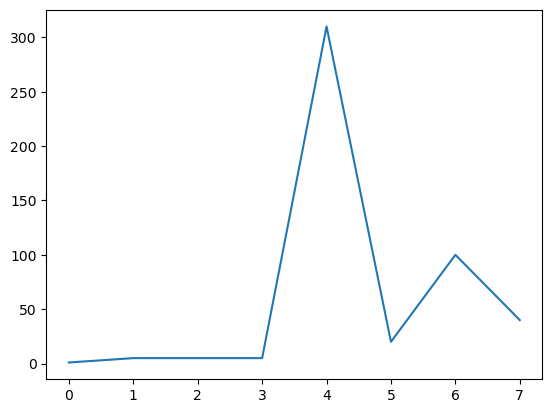

In [147]:
# Matplotlib is choosing the plot for us here, and it 
                                                # might tell the story we want.

nums_series = pd.Series([1, 5, 5, 5, 310, 20, 100, 40])
nums_series.plot()

<AxesSubplot:ylabel='Frequency'>

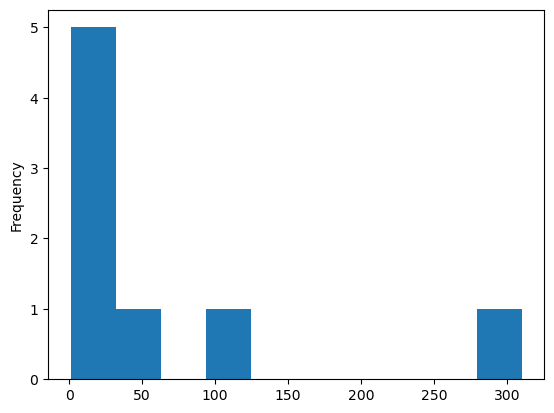

In [148]:
# So, here we specify the type of plot we would like 
# Matplotlib to use.
nums_series.plot.hist()

[Text(0.5, 0, 'Letter'), Text(0, 0.5, 'Frequency')]

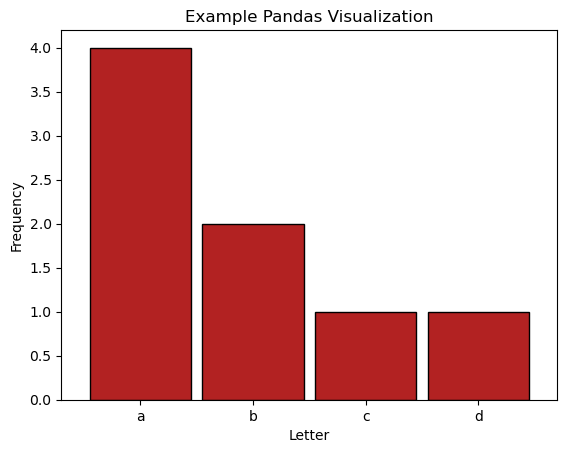

In [152]:
# Use the parameters of the .plot method to customize my chart.

(
    pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).
    value_counts().plot.bar(title='Example Pandas Visualization', 
                            rot=0,  # rotation of x axis letters
                            color='firebrick', 
                            ec='black',  # ec = outline
                            width=.9).set(xlabel='Letter',
                            ylabel='Frequency')
)

## 7. Exercises Part III

Use pandas to create a Series named letters from the following string. The easiest way to make this string into a Pandas series is to use list to convert each individual letter into a single string on a basic Python list.

`'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'`

1. Which letter occurs the most frequently in the letters Series?

2. Which letter occurs the Least frequently?

3. How many vowels are in the Series?

4. How many consonants are in the Series?

5. Create a Series that has all of the same letters but uppercased.

6. Create a bar plot of the frequencies of the 6 most commonly occuring letters.

Use pandas to create a Series named numbers from the following list:

`['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']`

1. What is the data type of the numbers Series?

2. How many elements are in the number Series?

3. Perform the necessary manipulations by accessing Series attributes and methods to convert the numbers Series to a numeric data type.

4. Run the code to discover the maximum value from the Series.

5. Run the code to discover the minimum value from the Series.

6. What is the range of the values in the Series?

7. Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin.

8. Plot the binned data in a meaningful way. Be sure to include a title and axis labels.

Use pandas to create a Series named exam_scores from the following list:

`[60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]`

1. How many elements are in the exam_scores Series?

2. Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.

3. Plot the Series in a meaningful way and make sure your chart has a title and axis labels.

4. Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades. Add the necessary points to the highest grade to make it 100, and add the same number of points to every other score in the Series as well.

5. Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. Save this as a Series named letter_grades.

6. Plot your new categorical letter_grades Series in a meaninful way and include a title and axis labels.

## More Practice

Revisit the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a.

After you complete each set of Series exercises, use any extra time you have to pursue the challenge below. You can work on these in the same notebook or file as the Series exercises or create a new practice notebook you can work in a little every day to keep your python and pandas skills sharp by trying to solve problems in multiple ways. These are not a part of the Series exercises grade, so don't worry if it takes you days or weeks to meet the challenge.

**Challenge yourself to be able to...**

- solve each using vanilla python.

- solve each using list comprehensions.

- solve each by using a pandas Series for the data structure instead of lists and using vectorized operations instead of loops and list comprehensions.